In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

import matplotlib.font_manager as fm



mpl.rcParams['axes.unicode_minus'] = False



path = 'C:/Windows/Fonts/malgun.ttf'

font_name = fm.FontProperties(fname=path, size=50).get_name()

plt.rc('font', family=font_name)

In [14]:
df1 = pd.read_csv('./csvfiles/Salaries1.csv')
df1.head(2)

,Unnamed: 0,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
Unnamed: 0          50000 non-null int64
Id                  50000 non-null int64
EmployeeName        50000 non-null object
JobTitle            50000 non-null object
BasePay             50000 non-null float64
OvertimePay         50000 non-null float64
OtherPay            50000 non-null float64
Benefits            13841 non-null float64
TotalPay            50000 non-null float64
TotalPayBenefits    50000 non-null float64
Year                50000 non-null int64
Notes               0 non-null float64
Agency              50000 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(3), object(3)
memory usage: 5.3+ MB


In [16]:
df=df1.drop(['Notes','Status','Unnamed: 0', 'Id'],axis=1)
df

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...
49995,Carl Jacobs Sr,Transit Operator,65612.03,15604.45,733.84,37250.65,81950.32,119200.97,2012,San Francisco
49996,Yee Lam,Social Work Supervisor,81284.05,0.00,2084.00,35831.69,83368.05,119199.74,2012,San Francisco
49997,Fe V Foronda,Licensed Vocational Nurse,68857.08,16740.17,873.92,32725.45,86471.17,119196.62,2012,San Francisco
49998,Alison Schlageter,Administrative Analyst,83710.58,0.00,0.00,35478.91,83710.58,119189.49,2012,San Francisco


In [38]:
# BasePay의 평균?
print(df['BasePay'].mean())

# OverPay의 최대값?
print(df['OvertimePay'].max())

# 'JOSEPH DRISCOLL'의 job title
print(df[df['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle'].values)

# totalpaybenefit의 최고액을 수령하는 사람
print(df[df['TotalPayBenefits']==df['TotalPayBenefits'].max()]['EmployeeName'].values)

# 2011, 2012년 basepay의 연도별 평균
print(df.groupby('Year')['BasePay'].mean())

# jobtitle의 종류는 몇개
print(len(df.groupby('JobTitle')))


75601.13714620461
245131.88
['CAPTAIN, FIRE SUPPRESSION']
['NATHANIEL FORD']
Year
2011     63595.956517
2012    106964.140280
Name: BasePay, dtype: float64
1697


In [48]:
# jobtitle의 종류는 몇개 대소문자 구분없이

df['job']=[i.lower() for i in df['JobTitle'] ]
len(df.groupby('job'))

1408

In [47]:
len(df['JobTitle'].apply(lambda x : x.lower()).unique())

1408

# value_counts()
# sort_values()
# str.contains()

In [117]:
# JobTitle에서 가장 많은 Job 상위5개?
print(df.groupby('job')['job'].count().sort_values(ascending=False)[:5])
print('='*40)
print(df['job'].value_counts()[:5])
print('='*40)

# 2011년도에 오직 한사람만 종사하는 job의 갯수는?
print(sum(df[df['Year'] == 2011]['job'].value_counts()==1),'개')
print('='*40)

# 2011년도에 Chef 인 사람의 수는? (대소문자 구분없이)
print(sum(df[df['Year'] == 2011]['job'].values=='chef'),'명')
print(sum(df[df['Year'] == 2011]['job'].apply(lambda x : 'chef' in x)),'명')
print(len([i for i in df[df['Year'] == 2011]['job'] if 'chef' in i]))

print(sum(df['job'].str.contains('chef')))

job
transit operator    3040
registered nurse    2222
firefighter         1487
special nurse       1464
deputy sheriff      1273
Name: job, dtype: int64
transit operator    3040
registered nurse    2222
firefighter         1487
special nurse       1464
deputy sheriff      1273
Name: job, dtype: int64
200 개
5 명
5 명
5
5


#  서울시 구별 cctv 현황 분석========================
#### 구별로 인구당 cctv댓수 파악
#### 인구당 cctv 댓수와 상관관계가 높은 요인

In [143]:
cdf = pd.read_csv('./csvfiles/cctv_seoul.csv')
pdf1 = pd.read_excel('./csvfiles/population_seoul.xls')

In [122]:
cdf.head(2)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377


In [144]:
pdf1.head(2)

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자


In [129]:
cdf.rename(columns={'기관명':'구별','2013년도 이전':'2013년'}, inplace=True)
cdf.head(2)

,구별,소계,2013년,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377


In [137]:
# cctv 댓수 기준 상위 5개구
cdf.sort_values('소계', ascending=False)[:5]

,구별,소계,2013년,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [140]:
# 2016년도의 전년대비 cctv 증가율을 계산해서 새로운 칼럼  '16 증가율'에 입력

cdf['16년 증가율']=(cdf['2016년'] - cdf['2015년'])/cdf['2015년']
cdf

,구별,소계,2013년,2014년,2015년,2016년,16년 증가율
0,강남구,2780,1292,430,584,932,0.595890
1,강동구,773,379,99,155,377,1.432258
2,강북구,748,369,120,138,204,0.478261
3,강서구,884,388,258,184,81,-0.559783
4,관악구,1496,846,260,390,613,0.571795
5,광진구,707,573,78,53,174,2.283019
6,구로구,1561,1142,173,246,323,0.313008
7,금천구,1015,674,51,269,354,0.315985
8,노원구,1265,542,57,451,516,0.144124
9,도봉구,485,238,159,42,386,8.190476


In [151]:
pdf=pdf1[['자치구','인구','인구.3','인구.6','65세이상고령자']]
pdf.columns = ['구별', '인구수', '한국인', '외국인','고령자']
pdf.head()

,구별,인구수,한국인,외국인,고령자
0,자치구,합계,한국인,등록외국인,65세이상고령자
1,자치구,계,계,계,65세이상고령자
2,합계,10197604,9926968,270636,1321458
3,종로구,162820,153589,9231,25425
4,중구,133240,124312,8928,20764


In [153]:
pdf.drop([0,1,2],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [154]:
pdf.head()

,구별,인구수,한국인,외국인,고령자
3,종로구,162820,153589,9231,25425
4,중구,133240,124312,8928,20764
5,용산구,244203,229456,14747,36231
6,성동구,311244,303380,7864,39997
7,광진구,372164,357211,14953,42214


In [189]:
# null값 확인후 제거
pdf[pdf.isnull()]
pdf.dropna(inplace=True)
# 외국인비율 컬럼 생성
pdf['외국인비율']=pdf['외국인']/pdf['인구수']*100


# 고령자비율
pdf['고령자비율']=pdf['고령자']/pdf['인구수']*100
pdf.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
3,종로구,162820,153589,9231,25425,5.66945,15.6154
4,중구,133240,124312,8928,20764,6.70069,15.5839
5,용산구,244203,229456,14747,36231,6.03883,14.8364
6,성동구,311244,303380,7864,39997,2.52664,12.8507
7,광진구,372164,357211,14953,42214,4.01785,11.3428


In [184]:
pdf['고령자비율'].sort_values(ascending=False)[:5]

11    16.6003
3     15.6154
4     15.5839
5     14.8364
15    14.7208
Name: 고령자비율, dtype: object

In [185]:
pdf['외국인비율'].sort_values(ascending=False)[:5]

21     8.6636
20    7.34234
19      7.008
4     6.70069
5     6.03883
Name: 외국인비율, dtype: object

In [195]:
pdf['인구수']=pdf['인구수'].apply(lambda x: int(x))
pdf['한국인']=pdf['한국인'].apply(lambda x: int(x))
pdf['외국인']=pdf['외국인'].apply(lambda x: int(x))
pdf['고령자']=pdf['고령자'].apply(lambda x: int(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [197]:
pdf.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
3,종로구,162820,153589,9231,25425,5.66945,15.6154
4,중구,133240,124312,8928,20764,6.70069,15.5839
5,용산구,244203,229456,14747,36231,6.03883,14.8364
6,성동구,311244,303380,7864,39997,2.52664,12.8507
7,광진구,372164,357211,14953,42214,4.01785,11.3428


In [198]:
cdf.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [216]:
#구별 인구당 cctv 대수
ndf = pd.merge(pdf,cdf, left_on='구별', right_on='기관명')
ndf.drop(['기관명','2013년도 이전','2014년','2015년','2016년'], axis=1, inplace=True)
ndf.rename(columns={'소계':'cctv수'}, inplace=True)
ndf['cctv비율']=ndf['cctv수']/ndf['인구수']
ndf.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv수,cctv비율
0,종로구,162820,153589,9231,25425,5.66945,15.6154,1002,0.006154
1,중구,133240,124312,8928,20764,6.70069,15.5839,671,0.005036
2,용산구,244203,229456,14747,36231,6.03883,14.8364,1624,0.006650
3,성동구,311244,303380,7864,39997,2.52664,12.8507,1062,0.003412
4,광진구,372164,357211,14953,42214,4.01785,11.3428,707,0.001900


In [223]:
ndf.sort_values('cctv비율',ascending=False)[:5]

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv수,cctv비율
2,용산구,244203,229456,14747,36231,6.03883,14.8364,1624,0.006650
0,종로구,162820,153589,9231,25425,5.66945,15.6154,1002,0.006154
1,중구,133240,124312,8928,20764,6.70069,15.5839,671,0.005036
22,강남구,570500,565550,4950,63167,0.86766,11.0722,2780,0.004873
21,서초구,450310,445994,4316,51733,0.958451,11.4883,1930,0.004286


In [224]:
# cctv비율과 상관관계가 높은 특성은?
ndf.corr()

,인구수,한국인,외국인,고령자,cctv수,cctv비율
인구수,1.000000,0.998061,-0.153371,0.932667,0.306342,-0.514143
한국인,0.998061,1.000000,-0.214576,0.931636,0.304287,-0.513169
외국인,-0.153371,-0.214576,1.000000,-0.155381,-0.023786,0.079211
고령자,0.932667,0.931636,-0.155381,1.000000,0.255196,-0.541024
cctv수,0.306342,0.304287,-0.023786,0.255196,1.000000,0.575784
cctv비율,-0.514143,-0.513169,0.079211,-0.541024,0.575784,1.000000


## 한국영화 개봉일람

In [238]:
mdf = pd.read_csv('./csvfiles/개봉일람.csv', skiprows=5)

In [239]:
mdf.rename(columns={'전국':'전국스크린수','전국.1':'전국매출액','전국.2':'전국관객수','서울':'서울매출액','서울.1':'서울관객수'}, inplace=True)
mdf.drop(0, inplace=True)

,순번,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,장르,등급,영화구분
1,1.0,명량,김한민,(주)빅스톤픽쳐스,NaN,씨제이이앤엠(주),2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
2,2.0,극한직업,이병헌,"(주)어바웃필름,영화사 해그림 주식회사,씨제이이앤엠(주)",NaN,씨제이이앤엠(주),2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
3,3.0,신과함께-죄와 벌,김용화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",NaN,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,개봉영화,장편,한국,"1,912","115,698,654,137","14,410,754","27,530,825,087","3,346,172",판타지,12세이상관람가,일반영화
4,4.0,국제시장,윤제균,"(주)제이케이필름,씨제이이앤엠(주)",NaN,씨제이이앤엠(주),2014-12-17,개봉영화,장편,한국,966,"110,828,014,630","14,245,998","25,842,519,330","3,233,946",드라마,12세이상관람가,일반영화
5,5.0,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19700,19700.0,UFO를 타고 온 외계인 왕자,NaN,NaN,NaN,NaN,1984-01-01,개봉영화,장편,한국,0,0,0,0,"47,323",SF,연소자관람가,일반영화
19701,19701.0,W의 비극,김수형,한진흥업주식회사,NaN,NaN,1985-06-09,개봉영화,장편,한국,0,0,0,0,"8,624",드라마,연소자관람불가,일반영화
19702,19702.0,X게임,엠마뉴엘 그리센티,NaN,(주)한영필림,NaN,1997-07-05,개봉영화,장편,이탈리아,0,0,0,0,434,범죄,연소자관람불가,일반영화
19703,19703.0,Y의 체험,이장호,판영화사(주),NaN,NaN,1987-10-03,개봉영화,장편,한국,0,0,0,0,"37,520",드라마,고등학생이상관람가,일반영화


In [248]:
mdf.rename(columns={'전국스크린수':'스크린수'}, inplace=True)

In [246]:
mdf.drop(['순번','제작사','수입사','배급사','서울매출액','서울관객수','감독','영화구분','영화형태'], axis=1, inplace=True)

In [249]:
mdf.head()

,영화명,개봉일,영화유형,국적,스크린수,매출액,관객수,장르,등급
1,명량,2014-07-30,개봉영화,한국,"1,587","135,748,398,910","17,613,682",사극,15세이상관람가
2,극한직업,2019-01-23,개봉영화,한국,"1,978","139,647,979,516","16,264,944",코미디,15세이상관람가
3,신과함께-죄와 벌,2017-12-20,개봉영화,한국,"1,912","115,698,654,137","14,410,754",판타지,12세이상관람가
4,국제시장,2014-12-17,개봉영화,한국,966,"110,828,014,630","14,245,998",드라마,12세이상관람가
5,어벤져스: 엔드게임,2019-04-24,개봉영화,미국,"2,835","122,182,694,160","13,934,592",액션,12세이상관람가


In [261]:
mdf.isnull().sum(axis=0)

영화명       0
개봉일      18
영화유형      0
국적        9
스크린수      0
매출액     227
관객수       0
장르      101
등급       50
dtype: int64

In [263]:
mdf.fillna('0', inplace=True)

In [267]:
mdf['스크린수'] = mdf['스크린수'].apply(lambda x: int(x.replace(',','')))
mdf['매출액'] = mdf['매출액'].apply(lambda x: int(x.replace(',','')))
mdf['관객수'] = mdf['관객수'].apply(lambda x: int(x.replace(',','')))

In [278]:
# 국가별 매출액합계 상위 5개국
mdf.groupby('국적')['매출액'].sum().sort_values(ascending=False)[:10]

국적
한국     8984898889995
미국     7603096955226
일본      278292077442
영국      170372907804
프랑스     130439668878
중국       67458265748
독일       51235650931
벨기에      32700851734
스페인      23700860766
인도       17999989753
Name: 매출액, dtype: int64

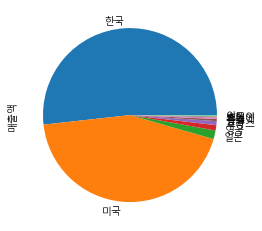

In [282]:
# 국가별 매출액합계 상위 5개국
mdf.groupby('국적')['매출액'].sum().sort_values(ascending=False)[:10].plot(kind='pie')
plt.show()

In [284]:
# 매출액이 가장 큰 영화
mdf[mdf['매출액'] == mdf['매출액'].max()]

,영화명,개봉일,영화유형,국적,스크린수,매출액,관객수,장르,등급
2,극한직업,2019-01-23,개봉영화,한국,1978,139647979516,16264944,코미디,15세이상관람가


In [285]:
# 관객수가 가장 많은 영화
mdf[mdf['관객수'] == mdf['관객수'].max()]

,영화명,개봉일,영화유형,국적,스크린수,매출액,관객수,장르,등급
1,명량,2014-07-30,개봉영화,한국,1587,135748398910,17613682,사극,15세이상관람가


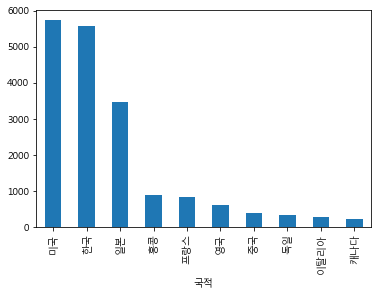

In [290]:
#국가별 개봉영화수 상위 10개국
mdf.groupby('국적')['등급'].count().sort_values(ascending=False)[:10].plot(kind='bar')
plt.show()

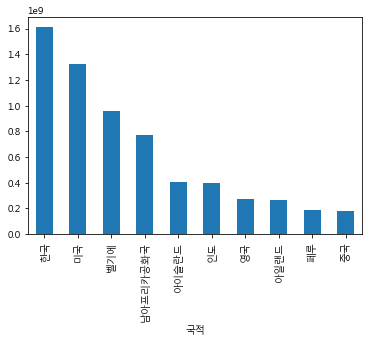

In [310]:
#국가별 평균영화 매출 상위 10개국
mdf.groupby('국적')['매출액'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.show()

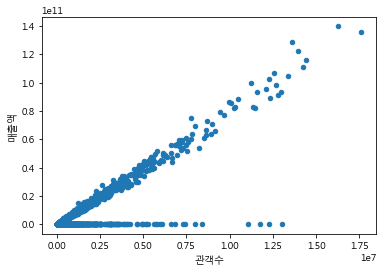

In [312]:
# 그래프를 통해서 매출액과 관객수, 매출액과 스크린수의 관계를 나타내시오
mdf.plot(x='관객수', y='매출액', kind='scatter')

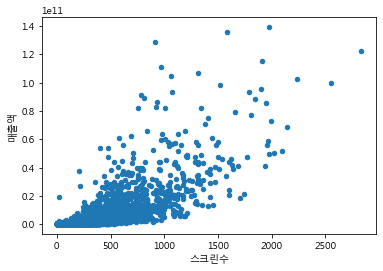

In [315]:
mdf.plot(x='스크린수', y='매출액', kind='scatter')

In [316]:
mdf.head(3)

,영화명,개봉일,영화유형,국적,스크린수,매출액,관객수,장르,등급
1,명량,2014-07-30,개봉영화,한국,1587,135748398910,17613682,사극,15세이상관람가
2,극한직업,2019-01-23,개봉영화,한국,1978,139647979516,16264944,코미디,15세이상관람가
3,신과함께-죄와 벌,2017-12-20,개봉영화,한국,1912,115698654137,14410754,판타지,12세이상관람가


In [350]:
# 월별 개봉영화 갯수 bar
mdf['개봉월'] = mdf['개봉일'].apply(lambda x : x[5:7])

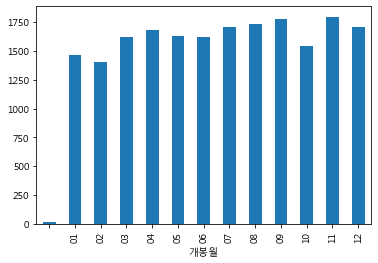

In [354]:
mdf.groupby('개봉월')['국적'].count().plot(kind='bar')
plt.show()

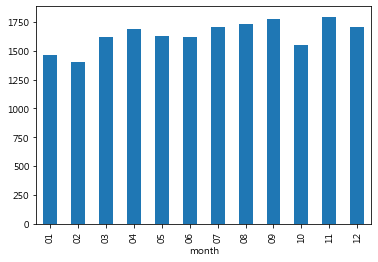

In [360]:
idx = mdf[mdf['개봉일']=='0'].index
mdf.drop(idx, inplace=True)
mdf['month'] = mdf['개봉일'].apply(lambda x : x.split('-')[1])
mdf.groupby('month')['국적'].count().plot(kind='bar')
plt.show()

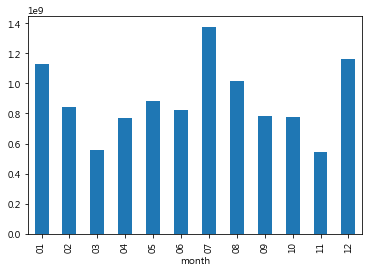

In [365]:
mdf.groupby('month')['매출액'].mean().plot(kind='bar')
plt.show()

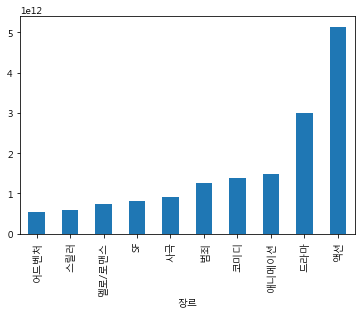

In [373]:
# 어떤 장르의 영화가 매출액 합이 가장 큰가?
mdf.groupby('장르')['매출액'].sum().sort_values()[-10:].plot(kind='bar')

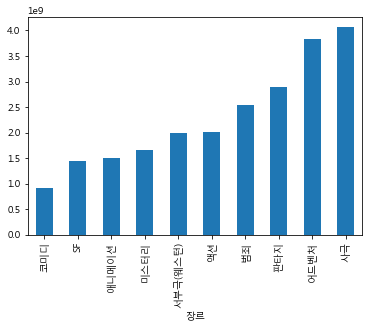

In [374]:
# 어떤 장르의 영화가 수익성이 가장 좋은가
mdf.groupby('장르')['매출액'].mean().sort_values()[-10:].plot(kind='bar')

In [376]:
mdf['매출액'].quantile(0.8)

27836910.0

In [386]:
mdf[(mdf['매출액'] < mdf['매출액'].quantile(0.999)) & (mdf['매출액']> 100000000)]

,영화명,개봉일,영화유형,국적,스크린수,매출액,관객수,장르,등급,개봉월,month
19,해운대,2009-07-22,개봉영화,한국,753,81934638201,11453338,액션,12세이상관람가,07,07
24,겨울왕국,2014-01-16,개봉영화,미국,1010,82461504400,10296101,애니메이션,전체관람가,01,01
25,인터스텔라,2014-11-06,개봉영화,미국,1342,82274331200,10273803,SF,12세이상관람가,11,11
28,검사외전,2016-02-03,개봉영화,한국,1812,77252755264,9699092,범죄,15세이상관람가,02,02
29,엑시트,2019-07-31,개봉영화,한국,1660,79142136162,9412450,코미디,12세이상관람가,07,07
...,...,...,...,...,...,...,...,...,...,...,...
4298,햄릿,2016-11-24,개봉영화,영국,22,114395000,8657,공연,15세이상관람가,11,11
4338,노트르담 드 파리,2017-11-01,개봉영화,한국,36,107289500,8350,뮤지컬,전체관람가,11,11
4381,콜드플레이: 헤드 풀 오브 드림스,2018-12-28,개봉영화,영국,23,112304000,8017,다큐멘터리,12세이상관람가,12,12
4483,메튜 본의 백조의 호수 3D,2012-08-02,개봉영화,영국,15,135872000,7163,공연,전체관람가,08,08


In [387]:
mdf[mdf['매출액']> 100000000]

,영화명,개봉일,영화유형,국적,스크린수,매출액,관객수,장르,등급,개봉월,month
1,명량,2014-07-30,개봉영화,한국,1587,135748398910,17613682,사극,15세이상관람가,07,07
2,극한직업,2019-01-23,개봉영화,한국,1978,139647979516,16264944,코미디,15세이상관람가,01,01
3,신과함께-죄와 벌,2017-12-20,개봉영화,한국,1912,115698654137,14410754,판타지,12세이상관람가,12,12
4,국제시장,2014-12-17,개봉영화,한국,966,110828014630,14245998,드라마,12세이상관람가,12,12
5,어벤져스: 엔드게임,2019-04-24,개봉영화,미국,2835,122182694160,13934592,액션,12세이상관람가,04,04
...,...,...,...,...,...,...,...,...,...,...,...
4298,햄릿,2016-11-24,개봉영화,영국,22,114395000,8657,공연,15세이상관람가,11,11
4338,노트르담 드 파리,2017-11-01,개봉영화,한국,36,107289500,8350,뮤지컬,전체관람가,11,11
4381,콜드플레이: 헤드 풀 오브 드림스,2018-12-28,개봉영화,영국,23,112304000,8017,다큐멘터리,12세이상관람가,12,12
4483,메튜 본의 백조의 호수 3D,2012-08-02,개봉영화,영국,15,135872000,7163,공연,전체관람가,08,08


In [390]:
# 연도별 개봉영화 갯수
mdf['개봉연도'] = mdf['개봉일'].apply(lambda x : x[:4])

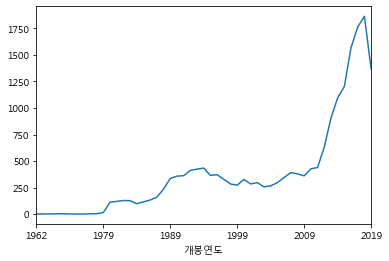

In [408]:
mdf.groupby('개봉연도')['영화명'].count().plot()

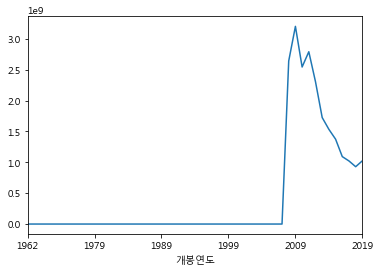

In [405]:
# 연도별 영화 평균매출
mdf.groupby('개봉연도')['매출액'].mean().plot()

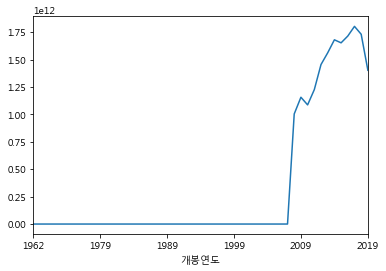

In [407]:
mdf.groupby('개봉연도')['매출액'].sum().plot()

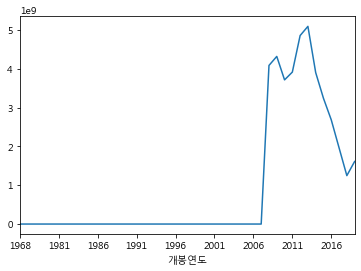

In [414]:
mdf[mdf['국적']=='한국'].groupby('개봉연도')['매출액'].mean().plot()